# Full Model Data Analysis

In [2]:
import pandas as pd
import numpy as np

In [71]:
# Read in the saved csv of the predictions for 4000 obs.
df = pd.read_csv('conclusion_data.csv')

In [73]:
# Separate the model predictions into their own columns
df['Model Predictions'] = df['Model Predictions'].apply(lambda x: 
                                                        eval(x) if isinstance(x, str) else x)

df[['SVM Pred', 'BERT Pred', 'LinReg Pred']] = pd.DataFrame(df["Model Predictions"].to_list(),
                                                           index = df.index)

In [75]:
# Remove the column where all of the predictions were combined
df.drop(columns=['Model Predictions'], inplace=True)

### Prediction Accuracies

In [113]:
# Find the accuracy of the entire prediciton function overall
accurate = df['Accurate (T/F)'].value_counts()[True]
accurate / 4000

0.91275

In [189]:
# Find the accuracy for each individual model in the function
total = len(df["Real Label"])

svm_accurate_count = (df['Real Label'] == df['SVM Pred']).sum()

bert_accurate_count = (df['Real Label'] == df['BERT Pred']).sum()

lg_accurate_count = (df['Real Label'] == df['LinReg Pred']).sum()

svm_accuracy = svm_accurate_count / total

bert_accuracy = bert_accurate_count / total

lg_accuracy = lg_accurate_count / total

print("SVM:", svm_accuracy)
print("BERT:", bert_accuracy)
print("LinReg:", lg_accuracy)

SVM: 0.8735
BERT: 0.951
LinReg: 0.89


In [212]:
''' Here we are analyzing the number of cases where one prediction was wrong,
but the other two predictions were right. We want to see this as the other two being right
saved the bad prediction from the one that was wrong.'''

condition1 = ((df['BERT Pred'] != df['Real Label']) & 
            (df['SVM Pred'] == df['Real Label']) & 
            (df['LinReg Pred'] == df['Real Label']))

condition2 = ((df['BERT Pred'] == df['Real Label']) & 
            (df['SVM Pred'] != df['Real Label']) & 
            (df['LinReg Pred'] == df['Real Label']))

condition3 = ((df['BERT Pred'] == df['Real Label']) & 
            (df['SVM Pred'] == df['Real Label']) & 
            (df['LinReg Pred'] != df['Real Label']))

total_preds_saved = condition1.sum() + condition2.sum() + condition3.sum()

print("BERT Wrong:", condition1.sum())
print("SVM Wrong:", condition2.sum())
print("LinReg Wrong:", condition3.sum())

BERT Wrong: 60
SVM Wrong: 174
LinReg Wrong: 107


In [214]:
# Percentages for the above conditions
print(str((total_preds_saved / 4000) * 100) + '% predictions saved when one was wrong')
print(str((condition1.sum() / 4000) * 100) + '% predictions saved by SVM and LinReg')
print(str((condition2.sum() / 4000) * 100) + '% predictions saved by BERT and LinReg')
print(str((condition3.sum() / 4000) * 100) + '% predictions saved by BERT and SVM')

8.525% predictions saved when one was wrong
1.5% predictions saved by SVM and LinReg
4.35% predictions saved by BERT and LinReg
2.675% predictions saved by BERT and SVM


#### Analyze where one prediction is right but the other's are wrong

In [223]:
'''Here we want the number of obs where one model was right but the
other two models overpowered the model and ultimately made the wrong 
prediction.'''

condition4 = ((df['BERT Pred'] == df['Real Label']) & 
            (df['SVM Pred'] != df['Real Label']) & 
            (df['LinReg Pred'] != df['Real Label']))

condition5 = ((df['BERT Pred'] != df['Real Label']) & 
            (df['SVM Pred'] == df['Real Label']) & 
            (df['LinReg Pred'] != df['Real Label']))

condition6 = ((df['BERT Pred'] != df['Real Label']) & 
            (df['SVM Pred'] != df['Real Label']) & 
            (df['LinReg Pred'] == df['Real Label']))

total_preds_lost = condition4.sum() + condition5.sum() + condition6.sum()

print("BERT Right:", condition4.sum())
print("SVM Right:", condition5.sum())
print("LinReg Right:", condition6.sum())

BERT Right: 213
SVM Right: 17
LinReg Right: 16


In [225]:
# Percentages for the above conditions
print(str((total_preds_lost / 4000) * 100) + '% predictions lost, when one was right')
print(str((condition4.sum() / 4000) * 100) + '% predictions lost by SVM and LinReg')
print(str((condition5.sum() / 4000) * 100) + '% predictions lost by BERT and LinReg')
print(str((condition6.sum() / 4000) * 100) + '% predictions lost by BERT and SVM')

6.15% predictions lost, when one was right
5.325% predictions lost by SVM and LinReg
0.42500000000000004% predictions lost by BERT and LinReg
0.4% predictions lost by BERT and SVM


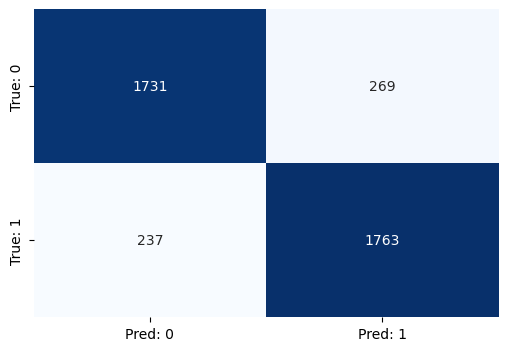

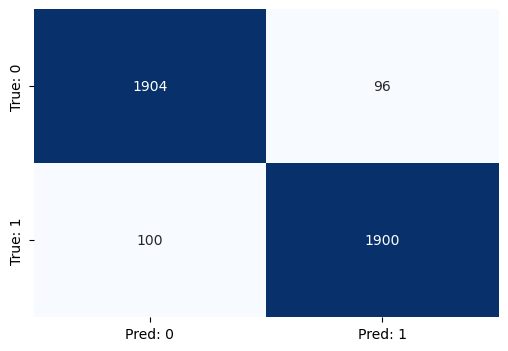

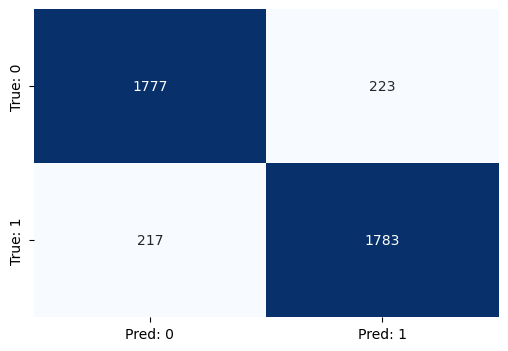

In [235]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Plotting confusion matrices for each model to see how accurate each one was for each class
for prediction in ['SVM Pred', 'BERT Pred', "LinReg Pred"]:
    conf_matrix = confusion_matrix(df['Real Label'], df[prediction])

    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
    plt.show()

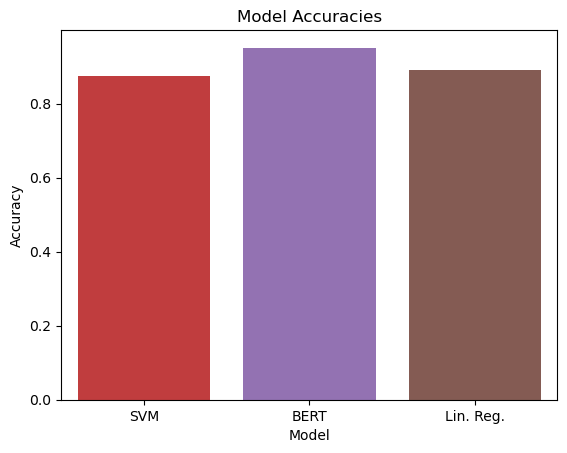

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting model accuracies for each model
model_accuracies = [svm_accuracy, bert_accuracy, lg_accuracy]
models = ['SVM', 'BERT', 'Lin. Reg.']

combined = pd.DataFrame({'Model': models, 'Accuracy': model_accuracies})

sns.barplot(x = 'Model', y = 'Accuracy', 
            data = combined, palette = sns.color_palette()[3:6], 
            hue = 'Model').set(title = 'Model Accuracies')

plt.savefig("model_accuracies_plot.png")